In [1]:
#Benötigte Libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import seaborn as sns
import time
import warnings
warnings.filterwarnings('ignore')

# MatplotLib Settings:
plt.style.use('default') # Matplotlib Style wählen
plt.figure(figsize=(10,5)) # Plot-Größe
plt.rcParams['font.size'] = 10; # Schriftgröße

<Figure size 1000x500 with 0 Axes>

# Messdaten sammeln und darstellen

## Messdaten sammeln

Aufgabe der Messtechnik ist es physikalische Messgrößen quantitativ zu beobachten und ist somit wichtiger Bestandteil in der Physik. Eine *quantitative* Beschreibung bedeutet immer, dass eine Messgröße mit einem Zahlenwert, $x$, und einer Maßeinheit, $E$, ausgedrückt wird. Um einen möglichst *guten* Zahlenwert experimentell zu ermitteln, wird neben der konkreten Durchführung ein Großteil der Experimentierzeit damit verbracht das Experiment vorzubereiten und zu planen, aber auch die Daten auszuwerten und darzustellen, Ergebnisse zu überprüfen und ggf. Messungen zu wiederholen. 
Was sich beim Messen nicht umgehen lässt, und was der ein oder andere sicherlich schon im Praktikum beobachten konnte, ist, dass Beobachtungen immer statistischen (zufälligen) Schwankungen unterliegen. Dies führt dazu, dass sich das Messergebnis immer verändert. eine Messung wird prinzipiell niemals den *wahren* Wert liefern können, weshalb wir sorgfältig messen und auswerten müssen. Es gibt *best practice* Methoden und Techniken, die in der Wissenschaft benutzt werden, um Unsicherheiten und Schwankungen der Messgröße quantitativ zu beschreiben um so ein Qualitätsmaß der Messung bzw. unseres Experimentes zu erhalten. Durch die Einhaltung der *best practice* Methoden kannst du jederzeit Rechenschaft ablegen und das Ergebnis begründen. Die grundlegende Norm für die Messtechnik ist in der *DIN-Norm DIN 1319* und dem *GUM* (Guide to the Expression of Uncertainty in Measurement) offiziell festgehalten.

- **Planung:** Was soll gemessen werden? Was wird hierfür benötigt? Welche Fehlerquellen/Störeinflüsse könnten auftreten, bzw. welche sind bekannt? Welche systematischen Unsicherheiten sind bekannt?
- **Durchführung:** Führe Protokoll! Wurde **alles**, was wichtig sein könnte, protokolliert und in Tabellen zusammengefasst, aufgeschrieben, fotografiert?
- **Auswertung:** Prüfe die Ergebnisse auf Vollständigkeit und Übersichtlichkeit! Hierzu gehört auch eine vollständige Abschätzung von Messunsicherheiten.
- **Prüfung:** Ergeben die Ergebnisse Sinn und sind diese konsistent mit anderen Ergebnissen aus der Literatur? Haben wir die Ergebnisse erwartet?
- **Darstellung:** Vollständige Angabe des Messergebnisses, bestehend aus Zahlenwert, Maßeinheit und Messunsicherheit. Verwende die wissenschaftliche Notation für Zehnerpotenzen:

<img src="pictures/praefix.png" width="500">

```{image} pictures/praefix.png
:width: 500px
:align: center
````


## Diagramme zeichnen

Mittels Diagrammen (engl. *Plots*) werden Messwerte dargestellt. Die folgenden Regeln helfen dabei, dass die Diagramme anschaulich sind und der Betrachter direkt erkennt, worum es geht:

- **Achsenbeschriftung:** Beschrifte die Achsen richtig, eindeutig und mit vollständiger Angabe: physikalische Größe und Maßeinheit!
- **Skalierung:** Wähle eine passende Skalierung in 1er-/2er-/5er oder 10er- (Dakaden) Schritten
- **Markierungen:** Wähle eine gute erkennbare Markierung für Messpunkte und ggf. eine angebrachte Linienbreite für Kurven. Hierbei können unterschiedliche Farben, Strichdicken, Stricharten und Markierungspunkte verwendet werden, oder eine Kombination. 
- **Titel:** Nutze passende Über-/ oder Unterschriften für das Diagramm, insbesondere wenn diese in der Auswertung im Text erwähnt werden.
- **Anderes:** Weitere Punkte und Linien, die nicht gemessen wurden, sondern nur als *Hilfe* dienen (z.B. Fit-Funktionen, Modelle, Referenzlinien) oder Kommentare sind, sollten besonders gekennzeichnet werden. 
- **Messunsicherheiten:** Für Messwerte (in Form von Fehlerbalken), aber auch für Funktionsterme und Ausgleichsgeraden, müssen Messunsicherheiten in den Graphen angegeben werden. 

Verwende eine sinnvolle Software für die Datenanalyse und die grafische Darstellung, welche auch Fit-Analysen unterstützen. Wir werden hier im folgenden Beispiele in `python` aufführen und Jupyter Notebooks verwenden. Die Codes auf dieser Seite können direkt benutzt und sogar ausgeführt werden. 
Weitere Software ist Qti-Plot (kostenlos) oder Matlab (Lizenzen über HSU verfügbar).

Im Folgenden sind zwei Diagramme dargestellt, wovon das zweite einige Defizite aufweist. Aufgrund der Darstellung wurde eine lineare Regression über einen anderen Messwertebereich durchgeführt, wodurch der Temperaturanstieg der letzten Jahre um einen Faktor 2 zu gering abgeschätzt wurde! 

`````{admonition} Aufgabe
:class: tip
Welche anderen Defizite fallen dir im Vergleich zum ersten Bild auf?
`````

Temperaturanstieg pro Jahr (von 1980 bis 2020): 0.019°C/Jahr


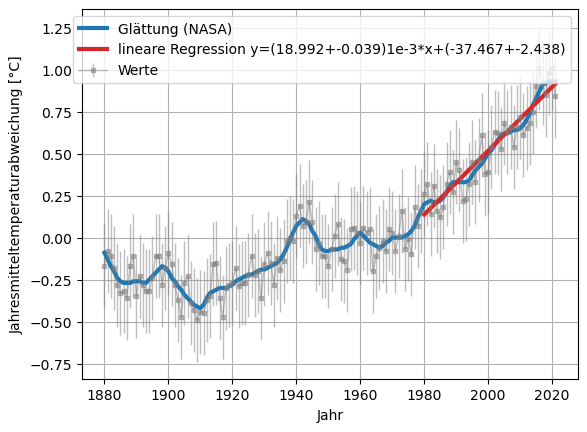

In [2]:
link = 'data/graph.csv' # Beispieldatei mit Klimadaten
global_mean = pd.read_csv(link, header = 1) # Daten einlesen
global_mean["uncertainty"] = 0.25 #Messunsicherheiten abschätzen, hier 0.25K Temperaturgenauigkeit angenommen

# Lineare Regression berechnen:
x=global_mean.loc[global_mean["Year"] >= 1980,"Year"]
y=global_mean.loc[global_mean["Year"] >= 1980,"No_Smoothing"]
y_err = global_mean.loc[global_mean["Year"] >= 1980,"uncertainty"]
model = np.polyfit(x, y, deg=1, w=1/y_err, cov=True) # 1. Wert = Anstieg , 2. Wert = Schnittpunkt mit y-Achse
y_model = model[0][0]*x+model[0][1] # Modell einer linearen Regression

# print(global_mean) # Eingelesene Daten ausgeben
plt.errorbar(global_mean["Year"],global_mean["No_Smoothing"], yerr=global_mean["uncertainty"], ls="-", lw=1, marker="s", ms=3, color="tab:gray", alpha=0.5, label="Werte");
plt.plot(global_mean["Year"],global_mean["Lowess(5)"], lw=3,  color="tab:blue", label="Glättung (NASA)");
plt.plot(x,y_model, ls="-", lw=3, color="tab:red", label=f"lineare Regression y=({model[0][0]*1000:.3f}+-{np.sqrt(model[1][0][0]*1000):.3f})1e-3*x+({model[0][1]:.3f}+-{np.sqrt(model[1][1][1]):.3f})");
plt.xlabel('Jahr')
plt.ylabel("Jahresmitteltemperaturabweichung [°C]")
plt.legend();
plt.grid();

# Temperaturanstieg ausgeben:
print(f"Temperaturanstieg pro Jahr (von 1980 bis 2020): {model[0][0]:.3f}°C/Jahr")

Temperaturanstieg pro Jahr (von 1980 bis 2020): 0.008°C/Jahr


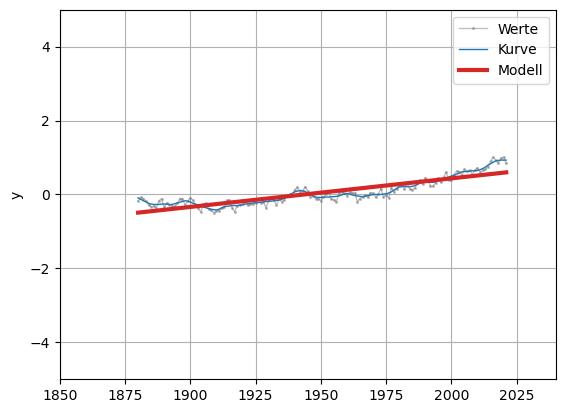

In [3]:
# Lineare Regression berechnen:
x=global_mean["Year"]
y=global_mean["No_Smoothing"]
y_err = global_mean["uncertainty"]
model = np.polyfit(x, y, deg=1, w=1/y_err, cov=True) # 1. Wert = Anstieg , 2. Wert = Schnittpunkt mit y-Achse
y_model = model[0][0]*x+model[0][1] # Modell einer linearen Regression

plt.plot(global_mean["Year"],global_mean["No_Smoothing"], ls="-", lw=1, marker="s", ms=1, color="tab:gray", alpha=0.5, label="Werte");
plt.plot(global_mean["Year"],global_mean["Lowess(5)"], lw=1,  color="tab:blue", label="Kurve");
plt.plot(x,y_model, ls="-", lw=3, color="tab:red", label=f"Modell");
plt.ylabel("y")
plt.xlim([1850,2040])
plt.ylim([-5,5])
plt.legend();
plt.grid();

# Temperaturanstieg ausgeben:
print(f"Temperaturanstieg pro Jahr (von 1980 bis 2020): {model[0][0]:.3f}°C/Jahr")

## Python-Beispiel: Klimadaten plotten

### Daten einlesen

Im Folgenden Nutzen wir globale Klimadaten, die auf der Webseite der NASA zu finden sind: https://data.giss.nasa.gov/gistemp/. Hierbei handelt es sich um Temperaturdaten, die Anomalien gegenüber dem Mittelwert in den Jahren 1951-1980 aufweisen.
Es werden Daten von Dateien (online oder offline) eingelesen mit der Python Bilbiothek `pandas`. Die Daten werden in sogenannten *DataFrames* hier mit dem Namen `global_mean` abgespeichert. 

In [4]:
#link = "https://data.giss.nasa.gov/gistemp/graphs_v4/graph_data/Global_Mean_Estimates_based_on_Land_and_Ocean_Data/graph.csv"
link = 'data/graph.csv'
global_mean = pd.read_csv(link, header = 1) 

Wir geben das *DataFrame* aus um uns die Messdaten einmal anzusehen: 

In [5]:
global_mean.head(6) # Ausgabe der ersten 5 Spalten
#global_mean.tail(5) # Ausgabe der letzten 5 Spalten
#global_mean # Ausgabe des DataFrames 

,Year,No_Smoothing,Lowess(5)
0,1880,-0.17,-0.09
1,1881,-0.08,-0.13
2,1882,-0.11,-0.17
3,1883,-0.18,-0.20
4,1884,-0.28,-0.24
5,1885,-0.33,-0.26


In der ersten Spalte befinden sich lediglich die Indizes der Messungen. Die zweite Spalte beinhaltet das Jahr und die dritte Spalte zeigt den gemessenen globalen Temperaturunterschied im Vergleich zur gemittelten Temeratur der Jahre 1951-1980. Die letzte Spalte zeigt die gleichen Messwerte, jedoch gefiltert. 

Einzelne Spalten kann man sich anzeigen lassen, indem den Spaltel-Namen des zugehörigen *DataFrames* nutzt:

In [6]:
global_mean['Year']

0      1880
1      1881
2      1882
3      1883
4      1884
       ... 
137    2017
138    2018
139    2019
140    2020
141    2021
Name: Year, Length: 142, dtype: int64

### Daten plotten

Als Beispiel für eine gelungene grafische Darstellung wollen wir die beiden Spalten, *No_Smoothing* and *Lowess(5)* gegenüber der Zeitachse *Year* plotten. Hierfür benützen wir die Python Library `matplotlib`:

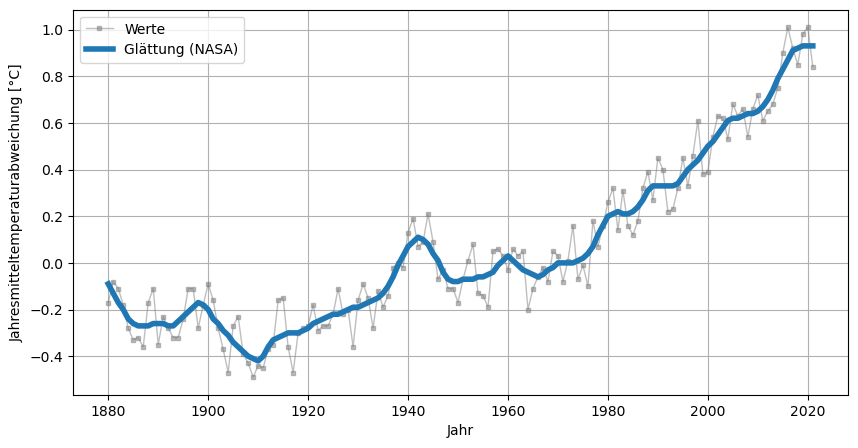

In [7]:
import matplotlib.pyplot as plt
plt.style.use('default')
plt.figure(figsize=(10,5))
plt.rcParams['font.size'] = 10;
plt.plot(global_mean["Year"],global_mean["No_Smoothing"], ls="-", lw=1, marker="s", ms=3, color="tab:gray", alpha=0.5, label="Werte");
plt.plot(global_mean["Year"],global_mean["Lowess(5)"], lw=4,  color="tab:blue", label="Glättung (NASA)");
plt.xlabel('Jahr')
plt.ylabel("Jahresmitteltemperaturabweichung [°C]")
plt.legend();
plt.grid();

### Messunsicherheiten

Bei diesem Datenset stehen uns leider keine Messunsicherheiten zur Verfügung. Um Sie jedoch als Fehlerbalken miteinzubeziehen, wollen wir im Folgenden annehmen, dass der Temperaturunterschied auf 0.25K genau messen werden konnte und fügen die unserem Datensatz hinzu:

In [8]:
global_mean["uncertainty"] = 0.25
print(global_mean)

     Year  No_Smoothing  Lowess(5)  uncertainty
0    1880         -0.17      -0.09         0.25
1    1881         -0.08      -0.13         0.25
2    1882         -0.11      -0.17         0.25
3    1883         -0.18      -0.20         0.25
4    1884         -0.28      -0.24         0.25
..    ...           ...        ...          ...
137  2017          0.92       0.91         0.25
138  2018          0.85       0.92         0.25
139  2019          0.98       0.93         0.25
140  2020          1.01       0.93         0.25
141  2021          0.84       0.93         0.25

[142 rows x 4 columns]


Grafisch darstellen tun wir Messunsicherheiten mittels Fehlerbalken und der Matplotlib-Funktion `plt.errorbar`. 

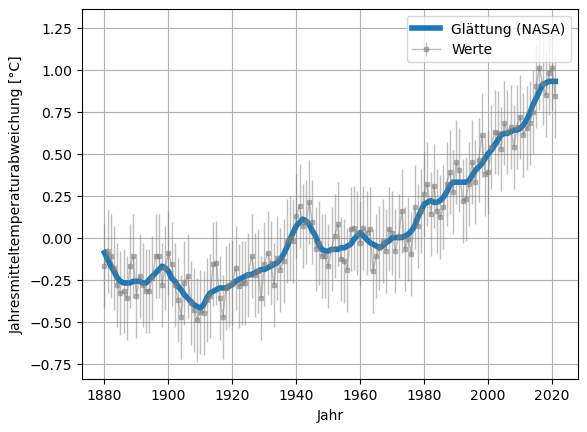

In [9]:
plt.errorbar(global_mean["Year"],global_mean["No_Smoothing"], yerr=global_mean["uncertainty"], ls="-", lw=1, marker="s", ms=3, color="tab:gray", alpha=0.5, label="Werte");
plt.plot(global_mean["Year"],global_mean["Lowess(5)"], lw=4,  color="tab:blue", label="Glättung (NASA)");
plt.xlabel('Jahr')
plt.ylabel("Jahresmitteltemperaturabweichung [°C]")
plt.legend();
plt.grid();

### Ausgleichsgerade berechnen und plotten

Mittels linearer Regression kann der Temperaturanstieg aus den Daten berechnet werden. Hierfür wird die Python Library `numpy` benutzt und die Funktion `polyfit` aufgerufen und in als `model` gespeichert. Diese Funktion benutzt die Least-Square Methode für polynomische Modelle. Weitere Informationen zu der Funktion findet ihr [hier](https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html). Mit der Option `cov=True` wird die Kovarianz-Matrix berechnet, welche die Unsicherheiten für die Fit-Parameter beinhaltet. 

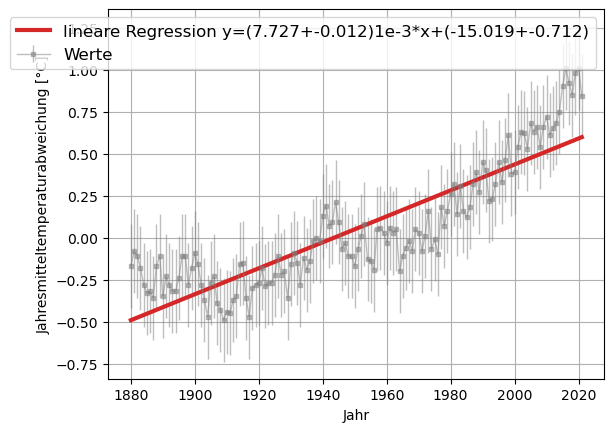

In [10]:
import numpy as np
import pandas as pd

x=global_mean["Year"]
y=global_mean["No_Smoothing"]
y_err = global_mean["uncertainty"]
model = np.polyfit(x, y, deg=1, w=1/y_err, cov=True) # 1. Wert = Anstieg , 2. Wert = Schnittpunkt mit y-Achse
y_model = model[0][0]*x+model[0][1] # Modell einer linearen Regression

plt.ylabel("Jahresmitteltemperaturabweichung [°C]")
plt.xlabel("Jahr")
plt.errorbar(global_mean["Year"],global_mean["No_Smoothing"], yerr=global_mean["uncertainty"], ls="-", lw=1, marker="s", ms=3, color="tab:gray", alpha=0.5, label="Werte");
plt.plot(x,y_model, ls="-", lw=3, color="tab:red", label=f"lineare Regression y=({model[0][0]*1000:.3f}+-{np.sqrt(model[1][0][0]*1000):.3f})1e-3*x+({model[0][1]:.3f}+-{np.sqrt(model[1][1][1]):.3f})");
plt.legend(fontsize=12);
plt.grid();

Das Model beinhaltet zwei Matrizen:

In [11]:
model

(array([ 7.72740894e-03, -1.50191421e+01]),
 array([[ 1.33257719e-07, -2.59919181e-04],
        [-2.59919181e-04,  5.07196269e-01]]))

Im ersten Array stehen die Fit-Parameter der linearen Ausgleichsgeraden entsprechend der obigen Deklaration: `y_model = model[0][0]*x+model[0][1]`.
Im zweiten Array, hier eine 2x2 Matrix, sind die Unsicherheiten in Form von der Kovarianz-Matrix dargestellt. Auf der Diagonalen stehen die Varianzen, $s^2$, auf den Nicht-Diagonalelementen stehen die Kovarianzen (Korrelationsterme zwischen $m$ und $b$):

$$\mathrm{cov}(m,b) = 
\begin{pmatrix}
 s_m^2 & s_{mb} \\
 s_{bm} & s_b^2
\end{pmatrix} $$

Der Temperaturanstieg kann entsprechend ausgegeben werden:

In [12]:
print(f"Temperaturanstieg pro Jahr (von 1981 bis 2020): {model[0][0]:.3f}°C/Jahr")
print(f"Temperaturanstieg seit Beginn der Messung: {(y_model.iloc[-1]-y_model.iloc[0]):.3f}°C")

Temperaturanstieg pro Jahr (von 1981 bis 2020): 0.008°C/Jahr
Temperaturanstieg seit Beginn der Messung: 1.090°C


**Vorsicht**: Die lineare Regression bezieht hier den ganzen Zeitraum mit ein, betrachten wir für den Temperaturgradienten nur die Daten von 1980 bis 2020:

In [13]:
x=global_mean.loc[global_mean["Year"] >= 1980,"Year"]
y=global_mean.loc[global_mean["Year"] >= 1980,"No_Smoothing"]
y_err = global_mean.loc[global_mean["Year"] >= 1980,"uncertainty"]

model = np.polyfit(x, y, deg=1, w=1/y_err, cov=True) # 1. Wert = Anstieg , 2. Wert = Schnittpunkt mit y-Achse
y_model = model[0][0]*x+model[0][1] # Modell einer linearen Regression
print(f"Temperaturanstieg pro Jahr (von 1980 bis 2020): {model[0][0]:.3f}°C/Jahr")

Temperaturanstieg pro Jahr (von 1980 bis 2020): 0.019°C/Jahr


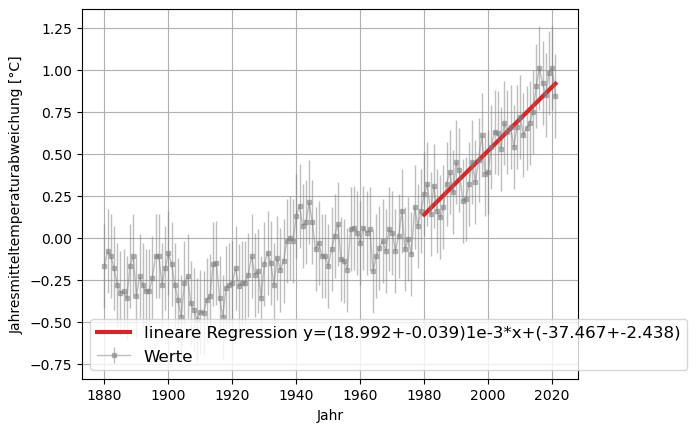

In [14]:
plt.ylabel("Jahresmitteltemperaturabweichung [°C]")
plt.xlabel("Jahr")
plt.errorbar(global_mean["Year"],global_mean["No_Smoothing"], yerr=global_mean["uncertainty"], ls="-", lw=1, marker="s", ms=3, color="tab:gray", alpha=0.5, label="Werte");
plt.plot(x,y_model, ls="-", lw=3, color="tab:red", label=f"lineare Regression y=({model[0][0]*1000:.3f}+-{np.sqrt(model[1][0][0]*1000):.3f})1e-3*x+({model[0][1]:.3f}+-{np.sqrt(model[1][1][1]):.3f})");
plt.legend(fontsize=12);
plt.grid();